In [7]:
# Results Expected from this Analysis
## Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
## Present the overall approach of the analysis in a presentation: 
### Mention the problem statement and the analysis approach briefly 
### Explain the results of univariate, bivariate analysis etc. in business terms
### Include visualisations and summarise the most important results in the presentation

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset after unzipping the large file within the project directory
df = pd.read_csv("loan.csv")

/var/folders/x4/87dx15b933dcrrmqqfysjws00000gr/T/ipykernel_17181/437466133.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [3]:
# Preview the Loan df
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


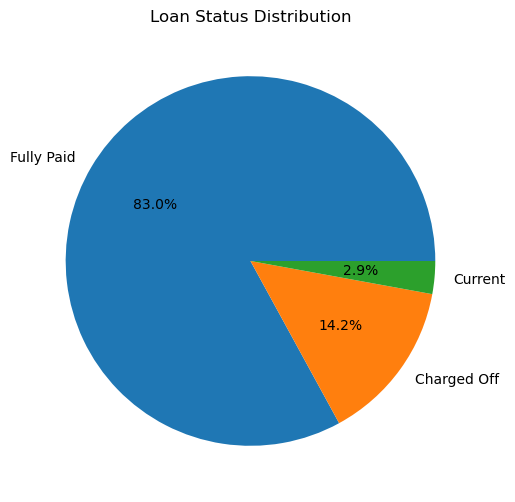

In [8]:
# Counts for each Loan Status
mode_counts = df['loan_status'].value_counts()

# Pie chart of Loan Status
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

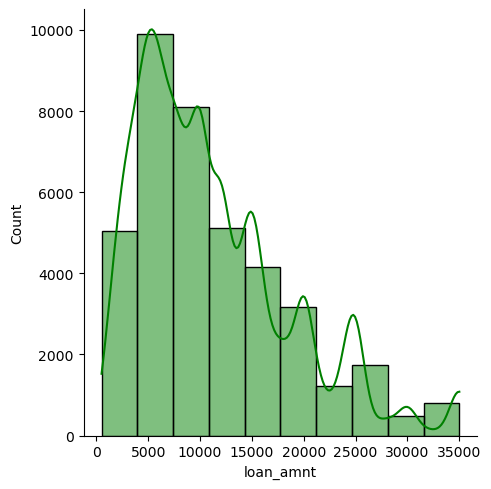

In [6]:
#Distribution plot for Loan Amount
sns.displot(df["loan_amnt"], bins=10, kde=True, color="g")
plt.show()